In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
def gaussian_orbital(x, y, x0, y0, sigma):
    """Need an extra square root in the prefactor and a /2 in the exponent so that the function squared is normalized (not the function itself), 
    since it represents a wave function, not the density."""
    n = 2
    return np.sqrt(1/(sigma**n * (2*np.pi)**(n/2))) * np.exp(-((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2) / 2)

def gaussian_asymmetrical_inversion_symmetric(x, y):
    sigma = 0.1
    factor = 2
    x0_arr = factor * np.array([-0.2, -0.3, -0.35, -0.3]) 
    y0_arr = factor * np.array([0.2, 0.1, 0.0, -0.1]) + 0.1

    def phi1_fun(x, y):
        phi = gaussian_orbital(x, y, x0_arr[0], y0_arr[0], sigma)
        for i in range(1, len(x0_arr)):
            phi += gaussian_orbital(x, y, x0_arr[i], y0_arr[i], sigma)
        return phi
    phi1 = phi1_fun(x, y)
    phi2 = phi1_fun(-x, -y)
    # single-electron and overlap densities
    rho11 = np.abs(phi1)**2
    rho22 = np.abs(phi2)**2
    rho12 = np.conj(phi1) * phi2
    return phi1, phi2, rho11, rho22, rho12

def plot_density(rho, xy_lim, title='Real-space Electronic Spin Density', cmap='berlin', ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(rho, extent=(-xy_lim, xy_lim, -xy_lim, xy_lim), origin='lower', cmap=cmap)
    ax.set_xlabel(r'$x$ (Angstrom)')
    ax.set_ylabel(r'$y$ (Angstrom)')
    ax.set_title(title)


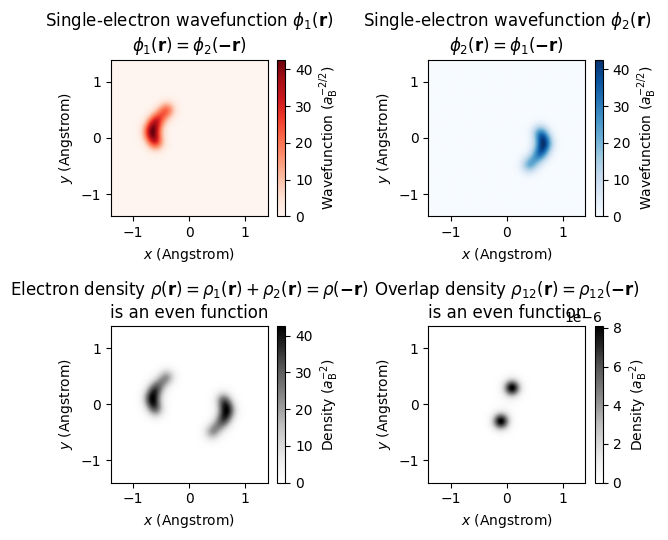

In [93]:
xy_lim = 1.4

xy_arr = np.linspace(-xy_lim, xy_lim, 201)
x, y = np.meshgrid(xy_arr, xy_arr)
cmap_phi1 = 'Reds'
cmap_phi2 = 'Blues'
cmap_density = 'Greys'

phi1, phi2, rho11, rho22, rho12 = gaussian_asymmetrical_inversion_symmetric(x, y)
fig, axes = plt.subplots(2, 2, figsize=(6.5, 5.5))

ax = axes[0,0]
plot_density(rho11, xy_lim=xy_lim, title=r'Single-electron wavefunction $\phi_1(\mathbf{r})$' + '\n' + r'$\phi_1(\mathbf{r}) = \phi_2(\mathbf{-r})$', ax=ax, cmap=cmap_phi1)
plt.colorbar(ax.images[0], ax=ax, orientation='vertical', label=r'Wavefunction ($a_\mathrm{B}^{-2/2}$)', pad=0.05, fraction=0.05)

ax = axes[0,1]
plot_density(rho22, xy_lim=xy_lim, title=r'Single-electron wavefunction $\phi_2(\mathbf{r})$' + '\n' + r'$\phi_2(\mathbf{r}) = \phi_1(\mathbf{-r})$', ax=ax, cmap=cmap_phi2)
plt.colorbar(ax.images[0], ax=ax, orientation='vertical', label=r'Wavefunction ($a_\mathrm{B}^{-2/2}$)', pad=0.05, fraction=0.05)

ax = axes[1,0]
plot_density(rho11+rho22, xy_lim=xy_lim, title=r'Electron density $\rho(\mathbf{r}) = \rho_1(\mathbf{r}) + \rho_2(\mathbf{r}) = \rho(\mathbf{-r})$' + '\n' + 'is an even function', ax=ax, cmap=cmap_density)
plt.colorbar(ax.images[0], ax=ax, orientation='vertical', label=r'Density ($a_\mathrm{B}^{-2}$)', pad=0.05, fraction=0.05)

ax = axes[1,1]
plot_density(rho12, xy_lim=xy_lim, title=r'Overlap density $\rho_{12}(\mathbf{r}) = \rho_{12}(\mathbf{-r})$' + '\nis an even function', ax=ax, cmap=cmap_density)
plt.colorbar(ax.images[0], ax=ax, orientation='vertical', label=r'Density ($a_\mathrm{B}^{-2}$)', pad=0.05, fraction=0.05)
plt.tight_layout()
plt.show()